# Implementing Recurrence Plots of Dynamic Systems and their RQA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import*
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
from RQAnalysis import*
from Utility import*
from DynamicSystems import*

## Implementing Rossler's Attractor for dt =0.05 and Step_Count = 2000

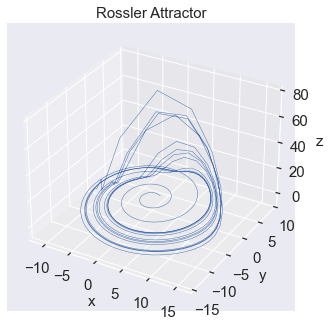

In [2]:
dt = 0.09
step_count = 800

xs=np.empty((step_count + 1,))
ys=np.empty((step_count + 1,))
zs=np.empty((step_count + 1,))
# The initial conditions.
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
# Iterate
for i in range(step_count):
    x_dot, y_dot, z_dot = Rossler(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (x_dot*dt)
    ys[i+1] = ys[i] + (y_dot*dt)
    zs[i+1] = zs[i] + (z_dot*dt)
fig=plt.figure()
ax=Axes3D(fig)
ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_zlabel("z", fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title("Rossler Attractor", fontsize=15)
plt.show()

## Plotting the Recurrence Plot of Rossler's Attractor

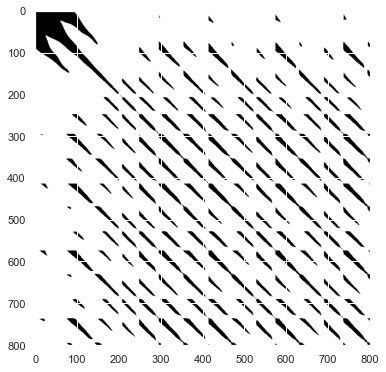

In [3]:
df_rossler = pd.DataFrame()
df_rossler['x_data'] = xs
df_rossler['y_data'] = ys
df_rossler['z_data'] = zs

recurr = rec_plot_binary(np.array(df_rossler[['x_data','y_data','z_data']]),eps = 5)
generate_plot(recurr)

## Quantification of Rossler's Attractor.

In [4]:
print("Quantification Analysis of Rossler Attractor")
Quantification_of_Recurrence_Plot(recurr)

Quantification Analysis of Rossler Attractor
Total number of recurrence points--> 567020
RR --> 0.8837579741926836
DET --> 0.9999576734506719
LAM --> 0.999987654756446
L_max--> 738
V_max--> 710


# Implementing Lorenz Attractor for dt = 0.05 and Step_Count = 1000

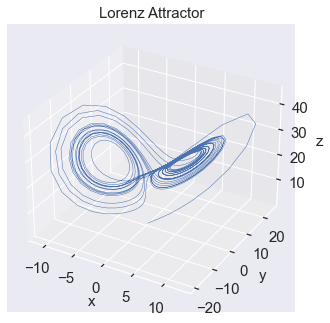

In [5]:
# Lorenz parameters and initial conditions
sigma, beta, rho = 3, 1,26.5 
x0, y0, z0 = 0.25, 0.1, 0.1
# Maximum time point and total number of time points
tmax, n = 50, 1000
# Integrate the Lorenz equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
x, y, z = f.T
# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig=plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z, "b-", lw=0.5)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_zlabel("z", fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title("Lorenz Attractor", fontsize=15)
plt.show()

## Plotting the Recurrence Plot of Lorenz Attractor

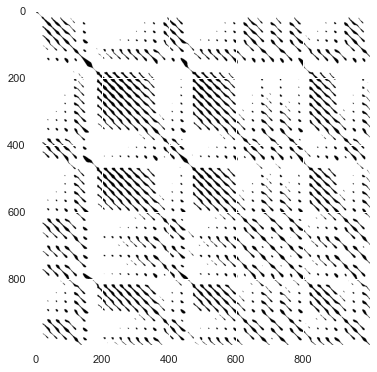

In [6]:
df_lorenz = pd.DataFrame()
df_lorenz['x_data'] = x
df_lorenz['y_data'] = y
df_lorenz['z_data'] = z

recurr_lorenz = rec_plot_binary(np.array(df_lorenz[['x_data','y_data','z_data']]),eps = 5)
generate_plot(recurr_lorenz)

## Quantification Analysis of Lorenz Attractor

In [7]:
print("Quantification Analysis of Lorenz Attractor")
Quantification_of_Recurrence_Plot(recurr_lorenz)

Quantification Analysis of Lorenz Attractor
Total number of recurrence points--> 899718
RR --> 0.899718
DET --> 0.9999577645440015
LAM --> 0.9999799937313691
L_max--> 988
V_max--> 991


# Implementation of Logistic Map

Text(0, 0.5, '$x_n$')

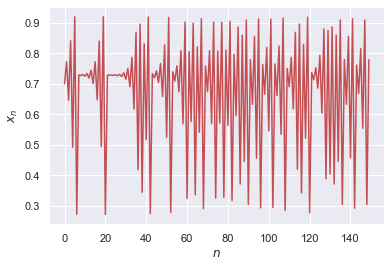

In [8]:
#  Parameters of logistic map
r = 3.679  # Bifurcation parameter
x0 = 0.7   # Initial value

#  Length of the time series
T = 150

time_series = logistic_map(x0, r, T)
#  Print the time series
# print(time_series)
#  Plot the time series
pylab.plot(time_series, "r")
#  You can include LaTex labels...
pylab.xlabel("$n$")
pylab.ylabel("$x_n$")

## Plotting the Recurrence Plot of Logistic Map

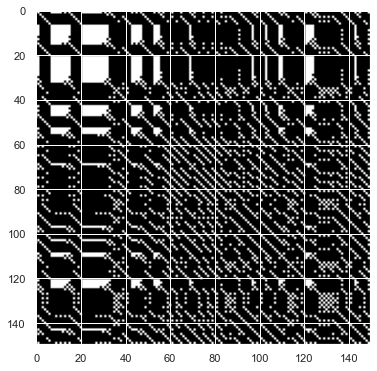

In [9]:
def rec_plot_binary_none(s, eps=0.10, steps=10):
    d = pdist(s[:,None])
    d = np.floor(d/eps)
    d[d>steps] = steps
    Z = squareform(d)
    for i in range(len(Z)):
        for j in range(len(Z)):
            if (Z[i][j]>0):
                Z[i][j] =0
            else:
                Z[i][j] =1
    return Z
recur_logistic = rec_plot_binary_none(time_series, eps=0.05,steps=1)
generate_plot(recur_logistic)

## Quantification of Logisitic Maps

In [10]:
print("Quantification Analysis of Logistic Maps")
Quantification_of_Recurrence_Plot(recur_logistic)

Quantification Analysis of Logistic Maps
Total number of recurrence points--> 4114
RR --> 0.18284444444444445
DET --> 0.8026251823043267
LAM --> 0.3179387457462324
L_max--> 19
V_max--> 12


# Implementing Henon's Attractor

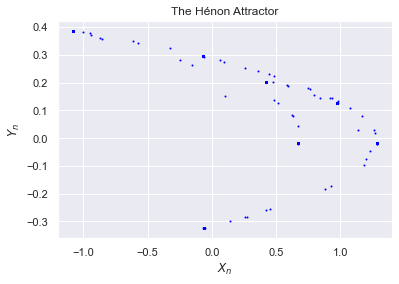

In [11]:
from pylab import*
from DynamicSystems import*
a=1.24
b=0.3

x = np.zeros(1002)
y = np.zeros(1002)

x[0] = 0.1
y[0] = 0.15

for i in range(1001):
    x[i + 1],y[i+1] = Henon_Map(x[i],y[i],a,b)
    
plt.scatter(x, y, c="blue", s=1)
plt.xlabel(r"$X_n$")
plt.ylabel(r"$Y_n$")
plt.title("The H\xe9non Attractor")
plt.show()

## Plotting Recurrence Plot of Henon's Attractor

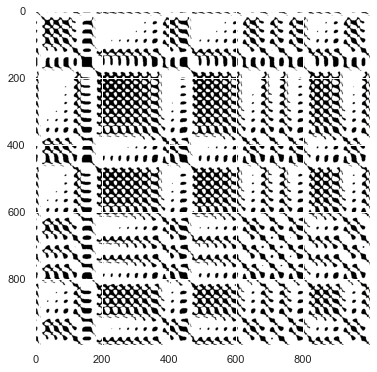

In [12]:
df_henon = pd.DataFrame()
df_henon['x_data'] = x
df_henon['y_data'] = y

recurr_henon = rec_plot_binary(np.array(df_lorenz[['x_data','y_data']]),eps = 5)
generate_plot(recurr_henon)

## Quantification Analysis of Recurrence Plot of Henon's Attractor

In [13]:
print("Quantification Analysis of Henon Attractor")
Quantification_of_Recurrence_Plot(recurr_henon)

Quantification Analysis of Henon Attractor
Total number of recurrence points--> 753332
RR --> 0.753332
DET --> 0.9995008840723612
LAM --> 0.9997132738288033
L_max--> 273
V_max--> 982


<AxesSubplot:>

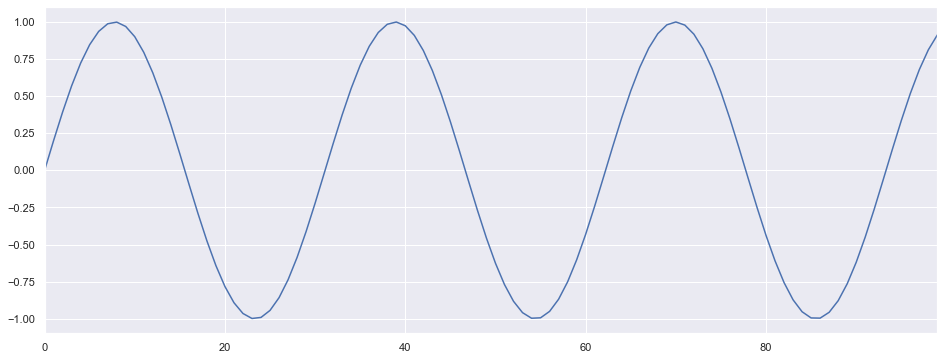

In [25]:
x = np.linspace(0, 20, 100)
df_sine = pd.DataFrame(x, columns=['values_x'])
df_sine['sine(values_x)'] = np.sin(x)

df_sine['sine(values_x)'].plot(figsize=(16,6))

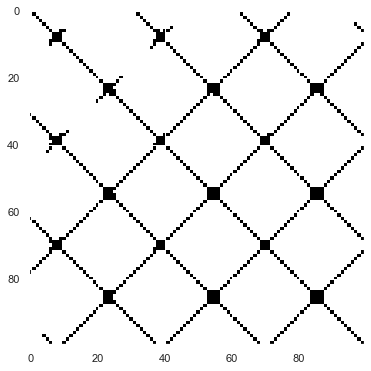

In [30]:
recurr_sine = rec_plot_binary(np.array(df_sine[['sine(values_x)']]),eps = 0.05,steps=5)
generate_plot(recurr_sine)

In [31]:
print("Quantification Analysis of Sine Values")
Quantification_of_Recurrence_Plot(recurr_sine)

Quantification Analysis of Sine Values
Total number of recurrence points--> 9288
RR --> 0.9288
DET --> 0.9989233419465977
LAM --> 0.9983850129198967
L_max--> 49
V_max--> 29


In [32]:
unique, counts = np.unique(recurr_sine, return_counts=True)
dict(zip(unique, counts))

{0.0: 712, 1.0: 9288}